In [1]:
#pırlanta fiyat tahmin analizi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("10-diamonds.csv")

In [5]:
#veri temizliğiyle başlayabiliriz
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()  #datatype lar olması gerektiği gibi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [9]:
df.shape

(53940, 11)

In [10]:
df = df.drop("Unnamed: 0", axis = 1) #gereksiz kolonu kaldırdım

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
df.describe()   #x y z nin min 0 olma verileri hatalı imkansız 

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
df[df["x"] == 0]  #x in 0 olduğu row ları getirir

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [18]:
df[df["y"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [20]:
df[df["z"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [22]:
len(df[df["x"] == 0]), len(df[df["y"] == 0]), len(df[df["z"] == 0]) 

(8, 7, 20)

In [24]:
#bu boş olanları kaldıralım (genişlik, boy,yükseklik 0 olan datalar)

In [25]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

In [27]:
len(df[df["x"] == 0]), len(df[df["y"] == 0]), len(df[df["z"] == 0])  #sildik

(0, 0, 0)

In [28]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [29]:
#outlier ları ele alma

In [30]:
df.shape

(53920, 10)

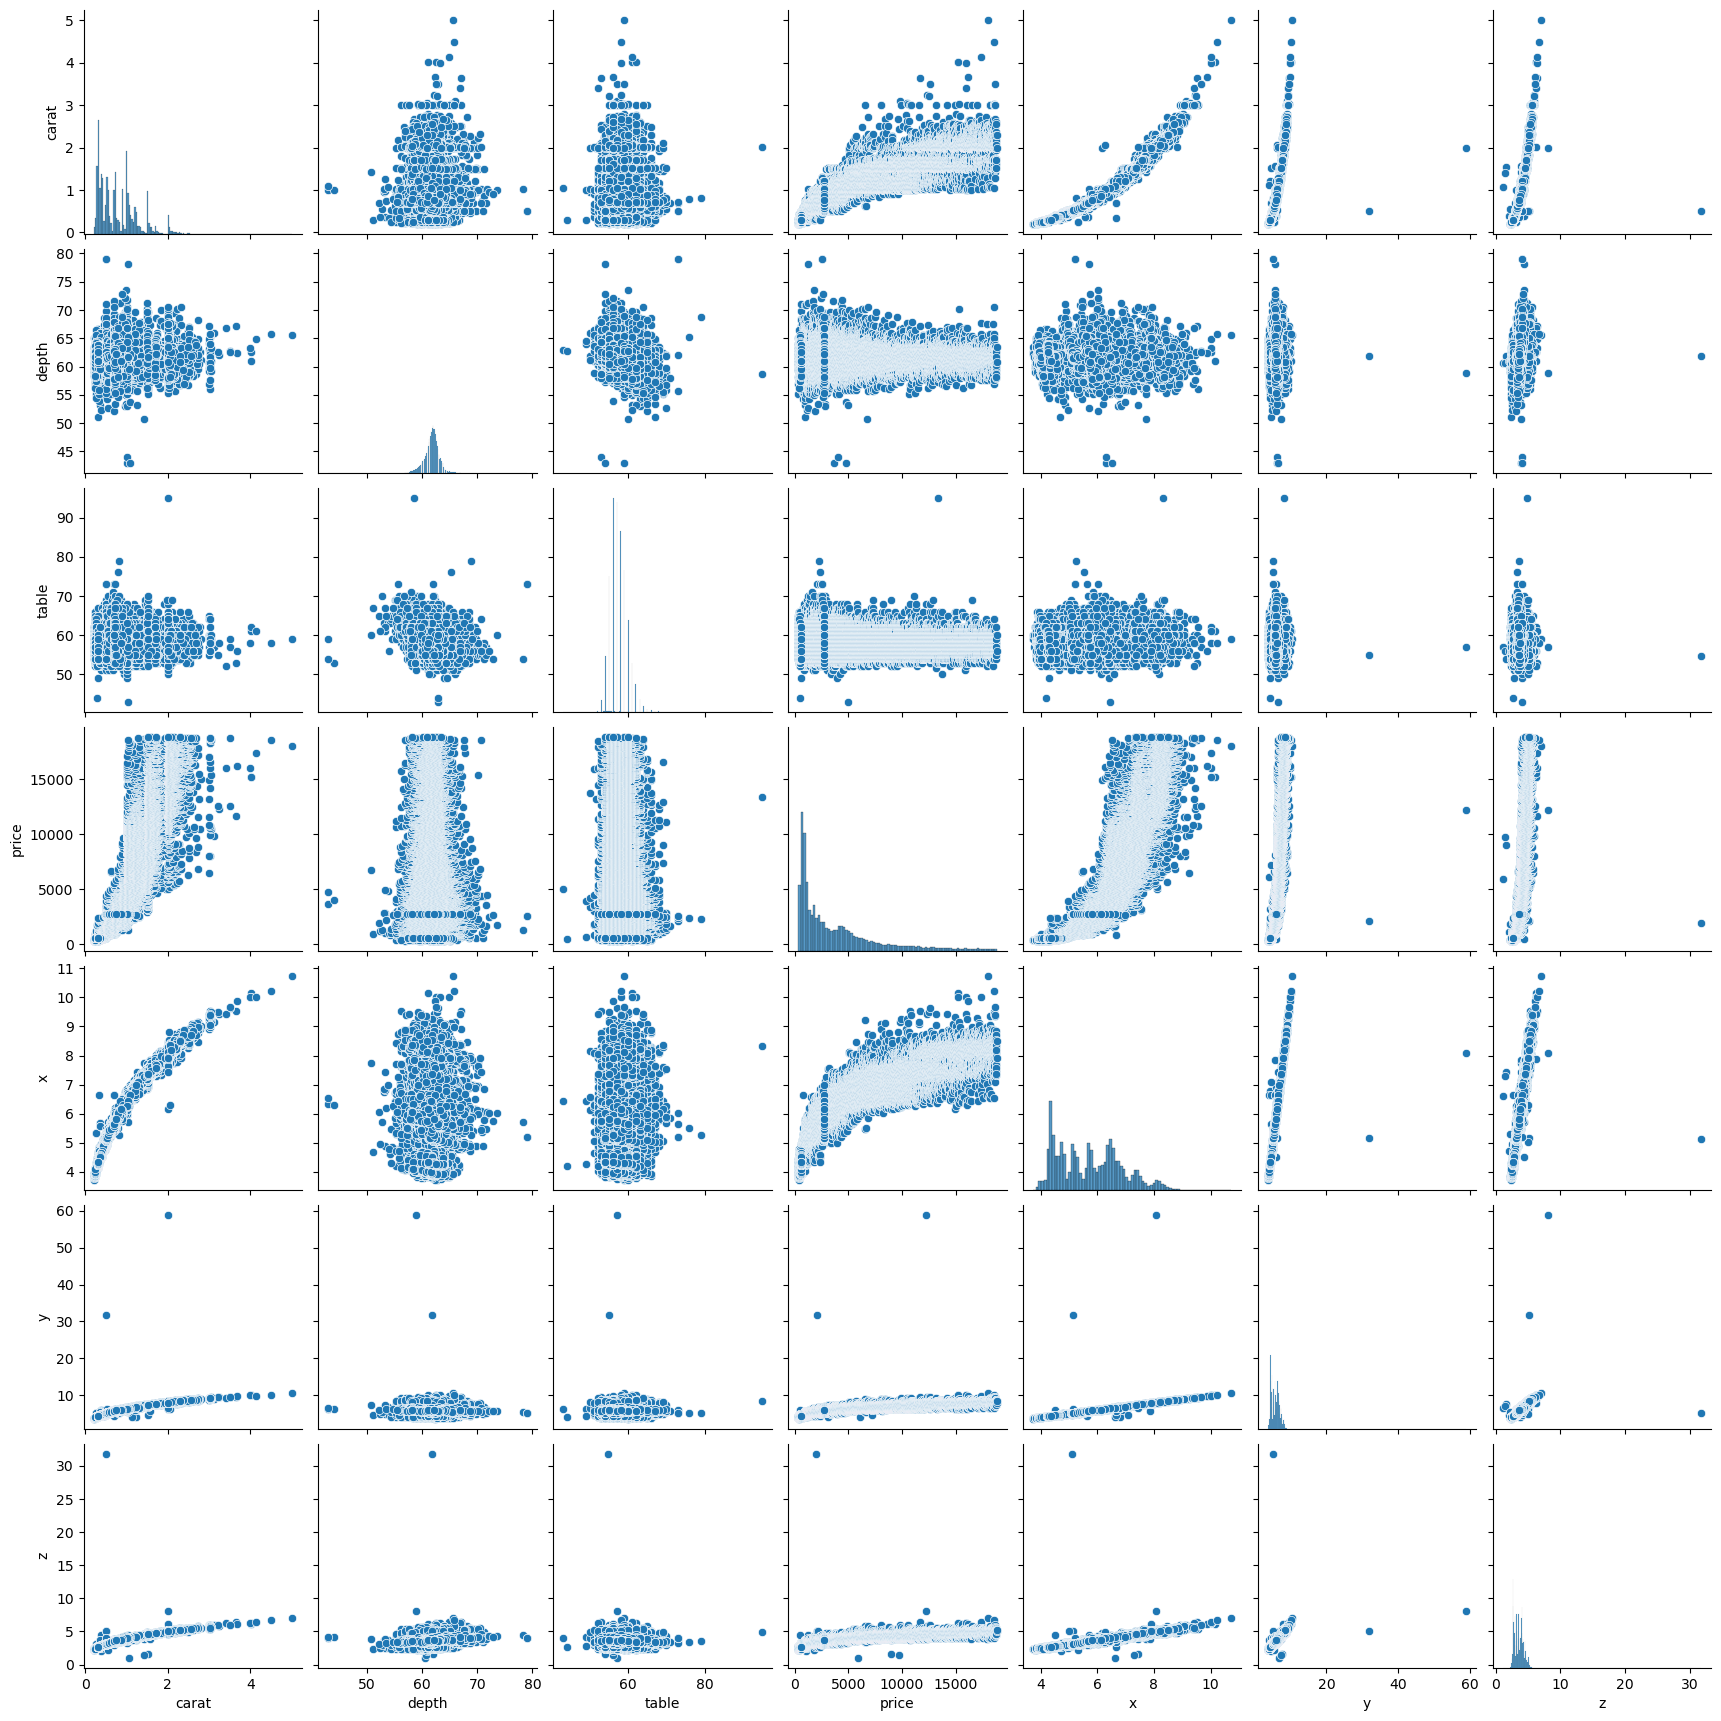

In [31]:
sns.pairplot(df)
plt.show()

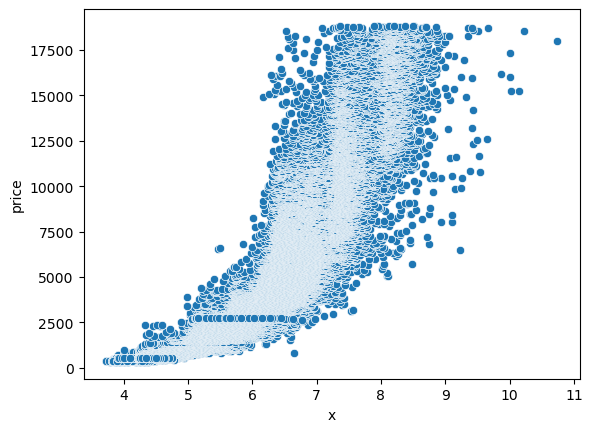

In [32]:
sns.scatterplot(x=df["x"], y=df["price"])
plt.show()

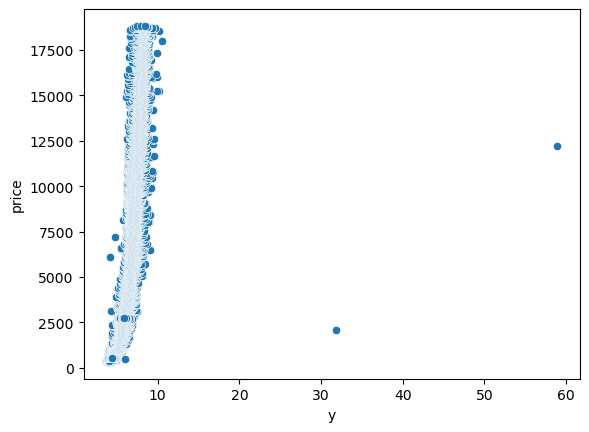

In [33]:
sns.scatterplot(x=df["y"], y=df["price"])
plt.show()

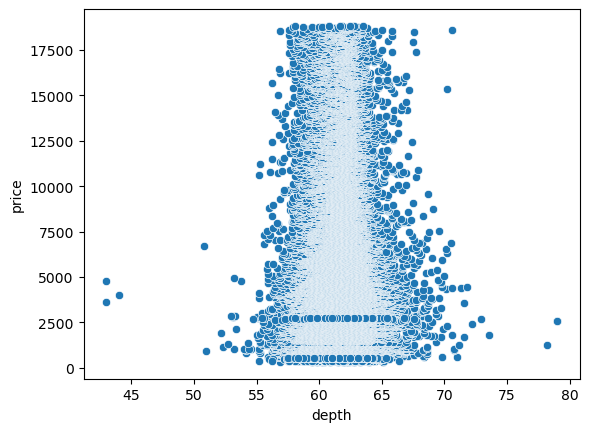

In [37]:
sns.scatterplot(x=df["depth"], y=df["price"])
plt.show()

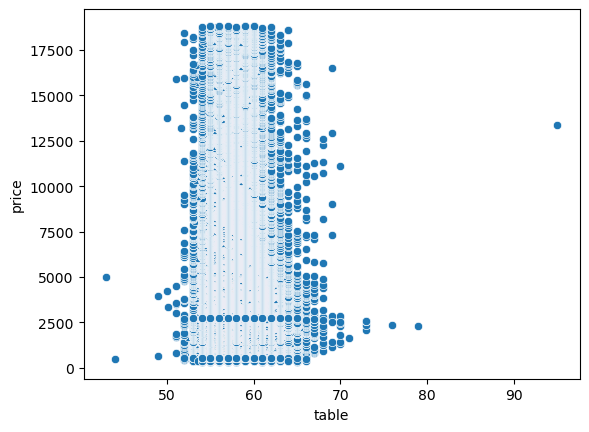

In [38]:
sns.scatterplot(x=df["table"], y=df["price"])
plt.show()

In [35]:
#outlierları aşırı bariz o sebeple tablodan bakarak bile atılabilir

In [42]:
len(df[(df["table"]<75)&(df["table"]>50)])  #9 datayı götürür

53911

In [43]:
len(df)

53920

In [46]:
len(df[(df["depth"]<75)&(df["depth"]>45)]) # 6 data götürür

53914

In [50]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<75)&(df["table"]>50)]
df = df[(df["z"]<30)&(df["z"]>2)]
df = df[(df["y"]<20)]

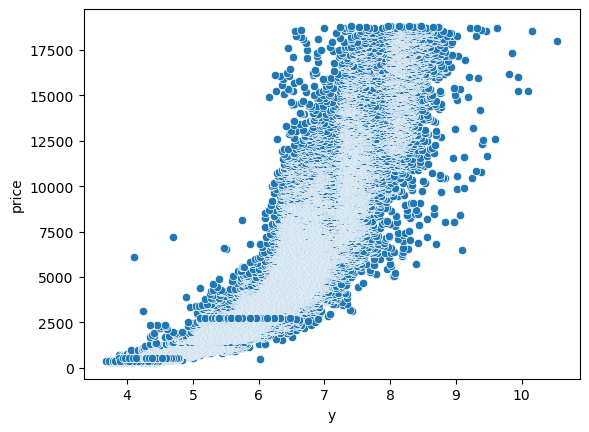

In [51]:
sns.scatterplot(x=df["y"], y=df["price"])
plt.show()

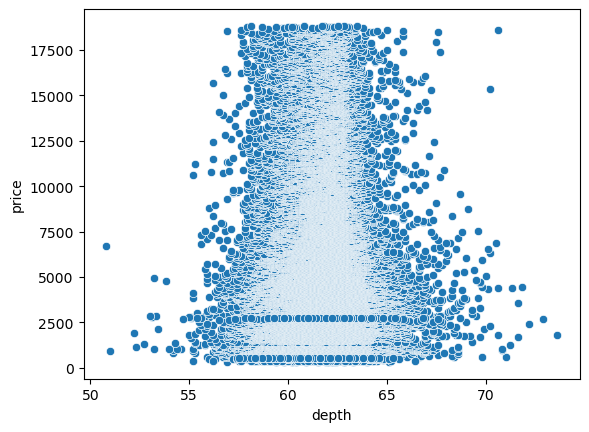

In [52]:
sns.scatterplot(x=df["depth"], y=df["price"])
plt.show()

In [53]:
#şimdi kategorik değişlenleri inceleyelim
#encoding yapıcaz

In [54]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df["cut"].value_counts()

cut
Ideal        21542
Premium      13779
Very Good    12079
Good          4902
Fair          1597
Name: count, dtype: int64

In [56]:
df["color"].value_counts()

color
G    11281
E     9790
F     9534
H     8295
D     6774
I     5418
J     2807
Name: count, dtype: int64

In [57]:
df["clarity"].value_counts()

clarity
SI1     13055
VS2     12250
SI2      9183
VS1      8164
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [58]:
#label encoder yapalım
#öncesinde train test spliti yapmak mantıklı olur

In [59]:
X = df.drop("price", axis=1)
y = df["price"]

In [62]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [63]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder = LabelEncoder()

In [83]:
for col in ["cut","color", "clarity"]:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [84]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
2777,0.83,2,2,2,62.1,55.0,6.00,6.05,3.74
4250,0.78,1,1,2,59.4,62.0,6.02,6.07,3.59
24453,2.03,2,6,3,62.1,57.0,8.06,8.12,5.02
4850,0.71,2,2,4,61.4,56.0,5.75,5.78,3.54
33336,0.41,3,3,5,59.2,58.0,4.80,4.83,2.85


In [85]:
X_train["cut"].value_counts()

cut
2    16250
3    10279
4     8997
1     3708
0     1190
Name: count, dtype: int64

In [86]:
X_test["cut"].value_counts()

cut
2    5292
3    3500
4    3082
1    1194
0     407
Name: count, dtype: int64

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40424 entries, 2777 to 7632
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40424 non-null  float64
 1   cut      40424 non-null  int64  
 2   color    40424 non-null  int64  
 3   clarity  40424 non-null  int64  
 4   depth    40424 non-null  float64
 5   table    40424 non-null  float64
 6   x        40424 non-null  float64
 7   y        40424 non-null  float64
 8   z        40424 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #scale ettik modeli uygulamak eğitmek kaldı

In [90]:
#MODEL EĞİTİMİ

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Mean absolute error: 861.8672407385867
Mean squared error: 1780426.357079892
R2 score: 0.888354798799229


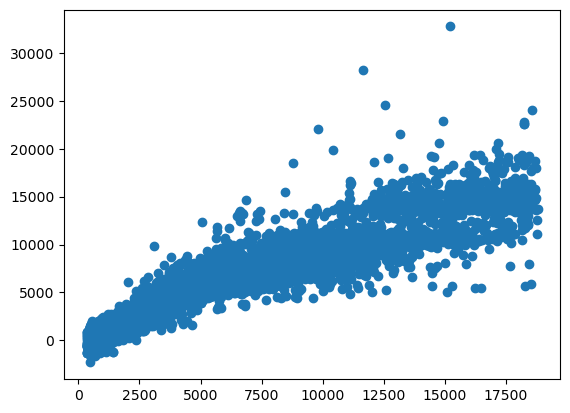

In [97]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R2 score:", score)
plt.scatter(y_test, y_pred)
plt.show()

In [98]:
#r2 score iyi çıkmış

In [99]:
from sklearn.svm import SVR

Mean absolute error: 1383.0400846680338
Mean squared error: 7997516.924544307
R2 score: 0.4984996809349892


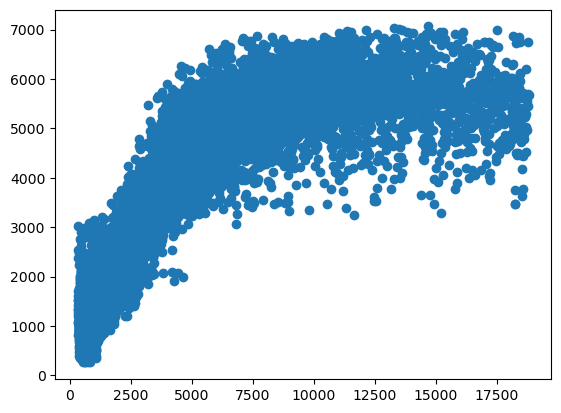

In [100]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R2 score:", score)
plt.scatter(y_test, y_pred)
plt.show()

In [101]:
#svr parametresiz R2 skoru çok da iyi çıkmadı hyperparameting tuning yapıcaz

In [102]:
#hyperparameter

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = {
    "C" : [0.1, 1, 10, 100, 1000],
    "gamma" : [1, 0.1, 0.001],
    "kernel" : ["rbf", "linear"]
}

In [109]:
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, n_jobs = -1, verbose = 3)

In [ ]:
grid.fit(X_train_scaled, y_train) #uzun sürecek burdan sonrası tekrar dene

In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R2 score:", score)
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
#r2 score 0.94 civarı baya iyileştirdik